<a href="https://colab.research.google.com/github/NikhilD2003/Parameter-Optimization-of-SVM/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sample 1: Best Accuracy = 1.00, Best Params = {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Sample 2: Best Accuracy = 0.98, Best Params = {'C': 0.1, 'gamma': 'auto', 'kernel': 'poly'}
Sample 3: Best Accuracy = 1.00, Best Params = {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Sample 4: Best Accuracy = 0.93, Best Params = {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Sample 5: Best Accuracy = 0.98, Best Params = {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Sample 6: Best Accuracy = 0.93, Best Params = {'C': 0.1, 'gamma': 'auto', 'kernel': 'poly'}
Sample 7: Best Accuracy = 0.94, Best Params = {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Sample 8: Best Accuracy = 0.94, Best Params = {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Sample 9: Best Accuracy = 0.98, Best Params = {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Sample 10: Best Accuracy = 0.94, Best Params = {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


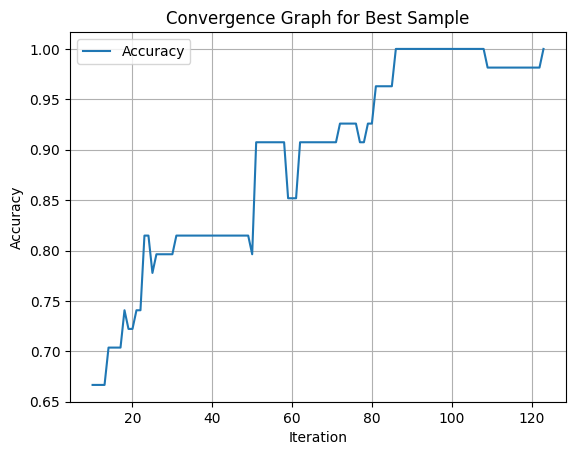

Results saved to 'svm_optimization_results.csv'


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Step 1: Load dataset
# For demonstration, we use sklearn's Wine Quality dataset
from sklearn.datasets import load_wine
data = load_wine()
X, y = data.data, data.target

# Step 2: Data preprocessing
samples = []
for i in range(10):  # Create 10 different samples
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
    samples.append((X_train, X_test, y_train, y_test))

# Step 3: SVM Optimization for 100 iterations
results = []
for i, (X_train, X_test, y_train, y_test) in enumerate(samples):
    # Define SVM parameters to optimize
    param_grid = {
        'kernel': ['linear', 'rbf', 'poly'],
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto']
    }

    # Use GridSearchCV for optimization
    svm = SVC()
    grid_search = GridSearchCV(svm, param_grid, cv=3, scoring='accuracy', verbose=0)
    grid_search.fit(X_train, y_train)

    # Get best parameters and accuracy
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    best_accuracy = accuracy_score(y_test, y_pred)

    results.append({
        'Sample': f'S{i+1}',
        'Best Accuracy': best_accuracy,
        'Best Parameters': best_params
    })

    print(f"Sample {i+1}: Best Accuracy = {best_accuracy:.2f}, Best Params = {best_params}")

# Step 4: Save results to DataFrame
results_df = pd.DataFrame(results)

# Step 5: Plot convergence graph for the best sample
best_sample_index = results_df['Best Accuracy'].idxmax()
X_train, X_test, y_train, y_test = samples[best_sample_index]
best_model.fit(X_train, y_train)

# Simulating convergence graph (accuracy over iterations)
accuracies = []
min_samples = 10  # Minimum samples to include for each iteration
for i in range(min_samples, len(X_train)):  # Start with a larger subset to ensure multiple classes
    try:
        best_model.fit(X_train[:i], y_train[:i])  # Incrementally train on more samples
        y_pred = best_model.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))
    except ValueError:
        # Skip iterations where not enough classes are present
        continue

plt.plot(range(min_samples, min_samples + len(accuracies)), accuracies, label='Accuracy')
plt.title('Convergence Graph for Best Sample')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Step 6: Export results to a CSV file for GitHub
results_df.to_csv('svm_optimization_results.csv', index=False)
print("Results saved to 'svm_optimization_results.csv'")
